In [1]:
import gdown

url = "https://drive.google.com/uc?id=1_KuJpF7AKVbytIld7V37Gf5afMHcwxLk"
output = "NUTS_posterior_samples.pkl"
gdown.download(url, output, quiet=False)
import pickle

with open("NUTS_posterior_samples.pkl", "rb") as f:
    loaded_samples = pickle.load(f)


Downloading...
From (original): https://drive.google.com/uc?id=1_KuJpF7AKVbytIld7V37Gf5afMHcwxLk
From (redirected): https://drive.google.com/uc?id=1_KuJpF7AKVbytIld7V37Gf5afMHcwxLk&confirm=t&uuid=b41a0192-25f4-475e-87a5-37ce838d29de
To: c:\Users\galma\Documents\Project\Bayesian-Neural-Network-Project\Boston Dataset Experiments\Obesity\Posterior Plotting\NUTS_posterior_samples.pkl
100%|██████████| 205M/205M [00:07<00:00, 27.8MB/s] 


In [1]:
import pickle

# Specify the path to your pickle file
file_path = r"D:\Maths_Y4\Project\NUTS_posterior_samples.pkl"

# Open the file and load the data
with open(file_path, 'rb') as f:
    loaded_samples = pickle.load(f)

# Now `data` contains the object loaded from the pickle file


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import block_diag
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'

Correlation: 0.3714183568954468 between layers.2.weight[6, 8] and layers.1.bias[8]
Correlation: 0.36327943205833435 between layers.2.weight[6, 6] and layers.1.bias[6]
Correlation: 0.3596702516078949 between layers.2.weight[6, 2] and layers.1.bias[2]
Correlation: 0.3571675419807434 between layers.2.weight[6, 9] and layers.1.bias[9]
Correlation: 0.35523685812950134 between layers.2.weight[6, 0] and layers.1.bias[0]
Correlation: 0.3544197380542755 between layers.2.weight[6, 3] and layers.1.bias[3]
Correlation: 0.35350117087364197 between layers.2.weight[6, 7] and layers.1.bias[7]
Correlation: 0.35174429416656494 between layers.2.weight[6, 4] and layers.1.bias[4]
Correlation: 0.3449966609477997 between layers.2.weight[6, 5] and layers.1.bias[5]
Correlation: 0.3382471799850464 between layers.2.weight[6, 1] and layers.1.bias[1]


## HMC

In [4]:
# # Load dictionary from the pickle file
# import pickle
# with open('post_samples.pkl', 'rb') as f:
#     loaded_samples = pickle.load(f)

In [15]:
def find_top_covariances(loaded_samples, top_n=5):
    covariances = []
    
    weight_keys = [k for k in loaded_samples.keys() if "weight" in k]
    bias_keys = [k for k in loaded_samples.keys() if "bias" in k]
    
    for w_key in weight_keys:
        weights = loaded_samples[w_key]  # Shape: (n_samples, output_dim, input_dim)
        output_dim, input_dim = weights.shape[1:]
        
        for b_key in bias_keys:
            biases = loaded_samples[b_key]  # Shape: (n_samples, output_dim)
            
            for i in range(output_dim):
                for j in range(input_dim):
                    for k in range(biases.shape[1]):  # Iterate over output_dim
                        cov_matrix = torch.cov(torch.stack([weights[:, i, j], biases[:, k]], dim=0))
                        cov = cov_matrix[0, 1].item()
                        
                        covariances.append((cov, w_key, b_key, i, j, k))
    
    covariances.sort(reverse=True, key=lambda x: x[0])
    return covariances[:top_n]

best_pairs = find_top_covariances(loaded_samples, top_n=20)
for cov, w_key, b_key, i, j, k in best_pairs:
    print(f"Covariance: {cov} between {w_key}[{i}, {j}] and {b_key}[{k}]")

Covariance: 0.33332759141921997 between layers.0.weight[7, 2] and layers.0.bias[7]
Covariance: 0.27260318398475647 between layers.2.weight[6, 8] and layers.1.bias[8]
Covariance: 0.25913989543914795 between layers.2.weight[6, 6] and layers.1.bias[6]
Covariance: 0.2589578628540039 between layers.2.weight[6, 2] and layers.1.bias[2]
Covariance: 0.2554457187652588 between layers.2.weight[6, 9] and layers.1.bias[9]
Covariance: 0.2504938244819641 between layers.2.weight[6, 4] and layers.1.bias[4]
Covariance: 0.25026658177375793 between layers.2.weight[6, 7] and layers.1.bias[7]
Covariance: 0.2500526010990143 between layers.2.weight[6, 0] and layers.1.bias[0]
Covariance: 0.2492234706878662 between layers.2.weight[6, 3] and layers.1.bias[3]
Covariance: 0.2473478615283966 between layers.2.weight[6, 5] and layers.1.bias[5]
Covariance: 0.23910318315029144 between layers.0.weight[8, 2] and layers.0.bias[8]
Covariance: 0.23417465388774872 between layers.2.weight[6, 1] and layers.1.bias[1]
Covariance

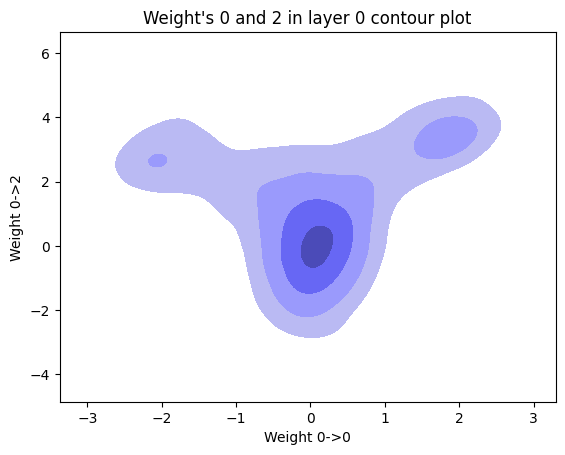

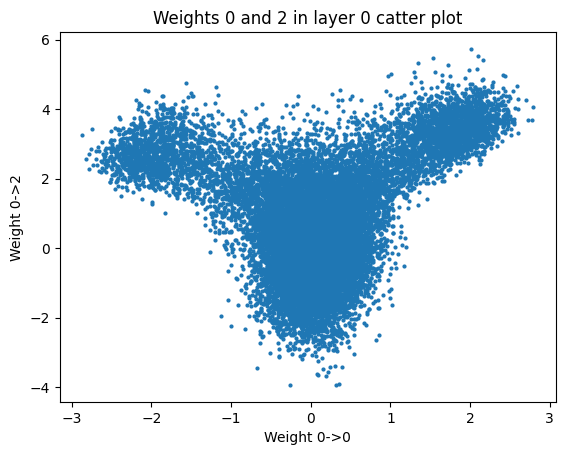

In [17]:
# These are the joint density plots of the 5 highest covariance pairs, in descending order

# x=loaded_samples['layers.1.weight'][:,4,1]
# y=loaded_samples['layers.0.bias'][:,2]

# x=loaded_samples['layers.0.weight'][:,7,2]
# y=loaded_samples['layers.0.bias'][:,7]

# x=loaded_samples['layers.2.weight'][:,6,8]
# y=loaded_samples['layers.1.bias'][:,8]

# 
x=loaded_samples['layers.0.weight'][:,8,2]
y=loaded_samples['layers.0.bias'][:,8]

# x=loaded_samples['layers.0.weight'][:,9,1]
# y=loaded_samples['layers.0.bias'][:,0]

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x = x, y = y, fill = True, levels = [0.05, 0.3, 0.6, 0.9, 1], color = 'blue')
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()

plt.scatter(x = x, y = y, s = 4)
# plt.xlim([-1.3,0.3])
# plt.ylim([-0.1,0.3])
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
plt.title("Weights 0 and 2 in layer 0 catter plot")
plt.show()

In [39]:
def find_top_correlations(loaded_samples, top_n=5):
    correlations = []
    
    weight_keys = [k for k in loaded_samples.keys() if "weight" in k]
    bias_keys = [k for k in loaded_samples.keys() if "bias" in k]
    
    for w_key in weight_keys:
        weights = loaded_samples[w_key]  # Shape: (n_samples, output_dim, input_dim)
        output_dim, input_dim = weights.shape[1:]
        
        for b_key in bias_keys:
            biases = loaded_samples[b_key]  # Shape: (n_samples, output_dim)
            
            for i in range(output_dim):
                for j in range(input_dim):
                    for k in range(biases.shape[1]):  # Iterate over output_dim
                        corr_matrix = torch.corrcoef(torch.stack([weights[:, i, j], biases[:, k]], dim=0))
                        corr = corr_matrix[0, 1].item()
                        
                        correlations.append((corr, w_key, b_key, i, j, k))
    
    correlations.sort(reverse=True, key=lambda x: x[0])
    return correlations[:top_n]

best_pairs = find_top_correlations(loaded_samples, top_n=5)
for cov, w_key, b_key, i, j, k in best_pairs:
    print(f"Correlation: {cov} between {w_key}[{i}, {j}] and {b_key}[{k}]")

Correlation: 0.49207803606987 between layers.0.weight[1, 1] and layers.0.bias[2]
Correlation: 0.48763033747673035 between layers.1.weight[4, 1] and layers.0.bias[2]
Correlation: 0.4576738476753235 between layers.1.weight[7, 9] and layers.0.bias[9]
Correlation: 0.42443880438804626 between layers.0.weight[5, 4] and layers.0.bias[5]
Correlation: 0.4114227592945099 between layers.0.weight[2, 4] and layers.0.bias[2]


In [71]:
print(loaded_samples['layers.0.weight'][:,:,:].shape)

print(loaded_samples['layers.0.bias'][:,:].shape)

torch.Size([20000, 10, 23])
torch.Size([20000, 10])


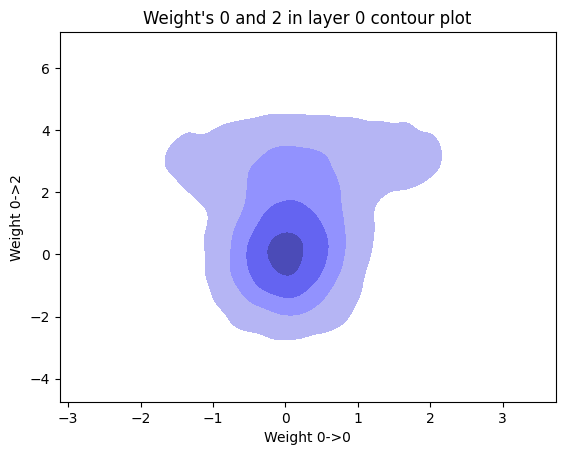

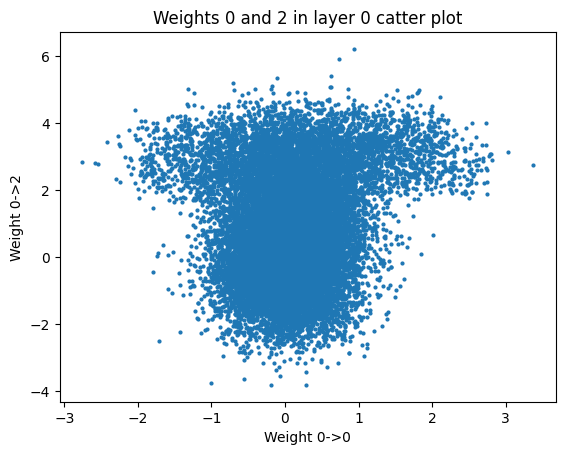

In [79]:
# These are the joint density plots of the 5 highest correlation pairs, in descending order


# x=loaded_samples['layers.1.weight'][:,4,1]
# y=loaded_samples['layers.0.bias'][:,2]

x=loaded_samples['layers.1.weight'][:,7,9]
y=loaded_samples['layers.0.bias'][:,9]



sns.kdeplot(x = x, y = y, fill = True, levels = [0.05, 0.3, 0.6, 0.9, 1], color = 'blue')
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()

plt.scatter(x = x, y = y, s = 4)
# plt.xlim([-1.3,0.3])
# plt.ylim([-0.1,0.3])
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
plt.title("Weights 0 and 2 in layer 0 catter plot")
plt.show()

In [ ]:
# These are the joint density plots of the 5 highest correlation pairs, in descending order


# x=loaded_samples['layers.1.weight'][:,4,1]
# y=loaded_samples['layers.0.bias'][:,2]

x=loaded_samples['layers.1.weight'][:,7,9]
y=loaded_samples['layers.0.bias'][:,9]



sns.kdeplot(x = x, y = y, fill = True, levels = [0.05, 0.3, 0.6, 0.9, 1], color = 'blue')
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()

plt.scatter(x = x, y = y, s = 4)
# plt.xlim([-1.3,0.3])
# plt.ylim([-0.1,0.3])
plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
plt.title("Weights 0 and 2 in layer 0 catter plot")
plt.show()

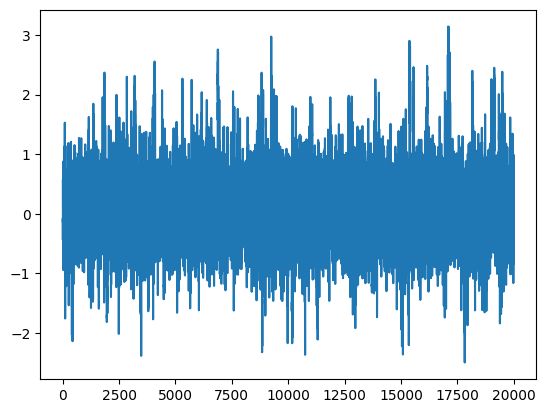

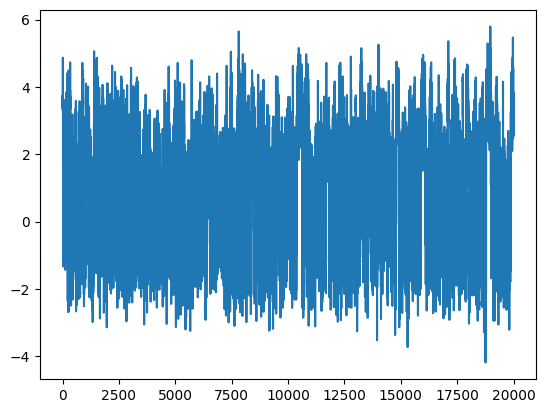

In [24]:
# evaluate mixing
def hmc_lines_layer0_w(i, j):
    y = loaded_samples['layers.0.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer1_w(i, j):
    y = loaded_samples['layers.1.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer2_w(i, j):
    y = loaded_samples['layers.2.weight'][:,i,j].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer0_b(i):
    y = loaded_samples['layers.0.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer1_b(i):
    y = loaded_samples['layers.1.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

def hmc_lines_layer2_b(i):
    y = loaded_samples['layers.2.bias'][:,i].detach().numpy()
    n = len(y)
    x = np.arange(1, n+1)
    plt.plot(x, y)
    plt.show()

hmc_lines_layer1_w(4,1)

hmc_lines_layer0_b(2)

In [5]:
loaded_samples_copy = loaded_samples.copy()
for key in list(loaded_samples_copy.keys()):
    if 'weight' in key:
        loaded_samples_copy[key] = loaded_samples_copy[key].reshape(loaded_samples_copy[key].shape[0], -1)
combined_params = torch.cat([loaded_samples_copy[key] for key in loaded_samples_copy], dim=1)
cov_matrix = torch.cov(combined_params.T).detach().numpy()  # Transpose to get cov along columns



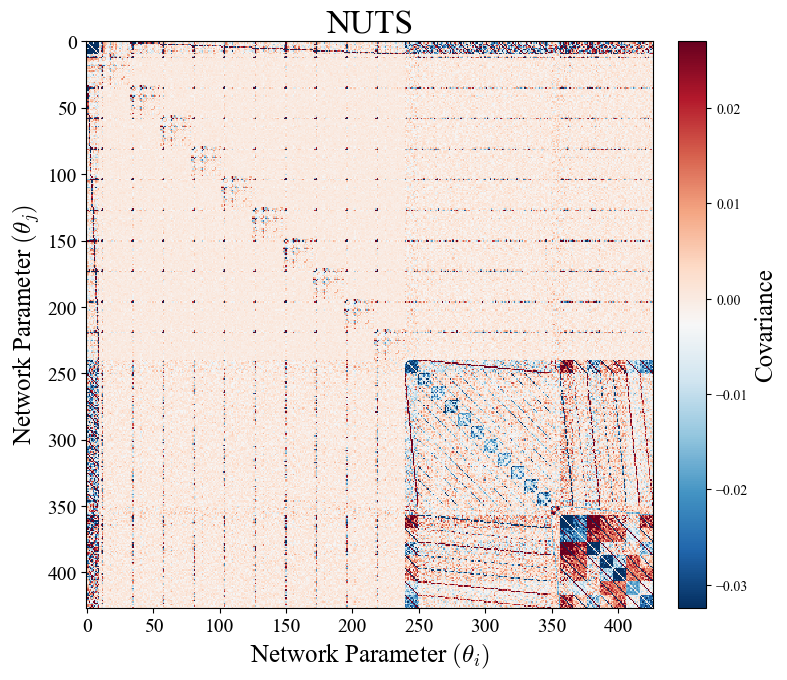

In [39]:
plt.figure(figsize=(8, 8))
norm = mcolors.Normalize(vmin=np.percentile(cov_matrix,1), vmax=np.percentile(cov_matrix, 99))  # Reduce extreme values' dominance
plt.imshow(cov_matrix, cmap='RdBu_r', norm=norm, interpolation='nearest')
plt.colorbar(fraction=0.0457, pad=0.04).set_label(label = r'Covariance',size=18)
plt.title("NUTS", fontsize = 24)
plt.xlabel(r'Network Parameter $(\theta_{i})$', fontsize = 18)
plt.ylabel(r'Network Parameter $(\theta_{j})$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Slang

In [7]:
# Open the file and load the data in binary mode
with open('SLANG_Results.pkl', 'rb') as f:
    slang_results = pickle.load(f)

# Now `slang_results` contains the object loaded from the pickle file
slang_results['optimizer']['state'].keys()
param_means = slang_results['optimizer']['state']['mean']
prec_factor = slang_results['optimizer']['state']['prec_factor']
prec_diag = slang_results['optimizer']['state']['prec_diag']

In [9]:

# Using woodbury matrix identity
D_inv = torch.diag(1/prec_diag.squeeze())
middle_term = torch.linalg.inv(torch.eye(prec_factor.size(1)) + prec_factor.T @ (D_inv @ prec_factor))
slang_cov_matrix = D_inv - ((D_inv @ prec_factor) @ (middle_term @(prec_factor.T @ D_inv)))
slang_cov_matrix = slang_cov_matrix.detach().cpu().numpy()


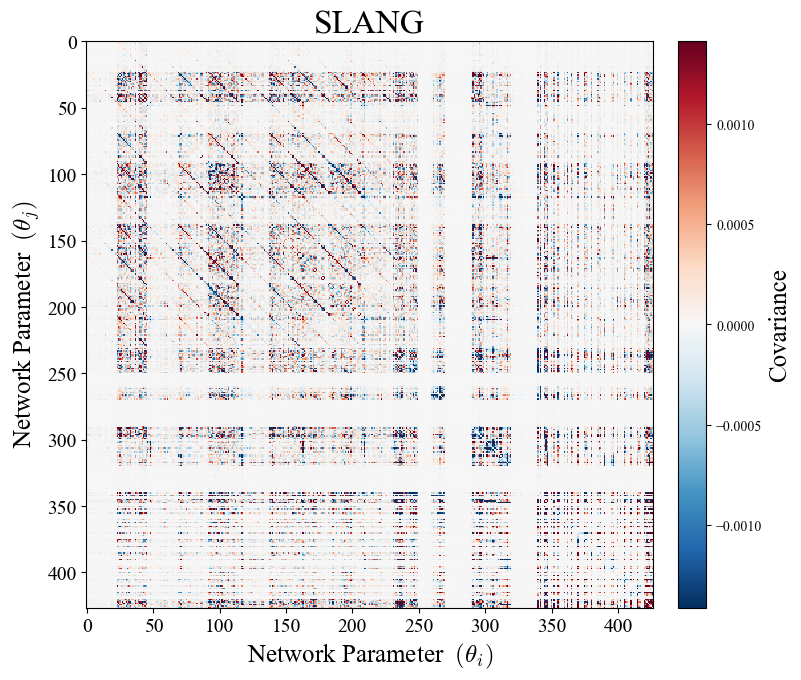

In [35]:
mat = slang_cov_matrix.copy()
np.fill_diagonal(mat, 0)

plt.figure(figsize=(8, 8))
norm = mcolors.Normalize(vmin=np.percentile(mat,1), vmax=np.percentile(mat, 99))  # Reduce extreme values' dominance
plt.imshow(mat, cmap='RdBu_r', norm=norm, interpolation='nearest')
plt.colorbar(fraction=0.0457, pad=0.04).set_label(label = r'Covariance',size=18)
plt.title("SLANG", fontsize = 24)
plt.xlabel(r'Network Parameter  $(\theta_{i})$', fontsize = 18)
plt.ylabel(r'Network Parameter  $(\theta_{j})$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()



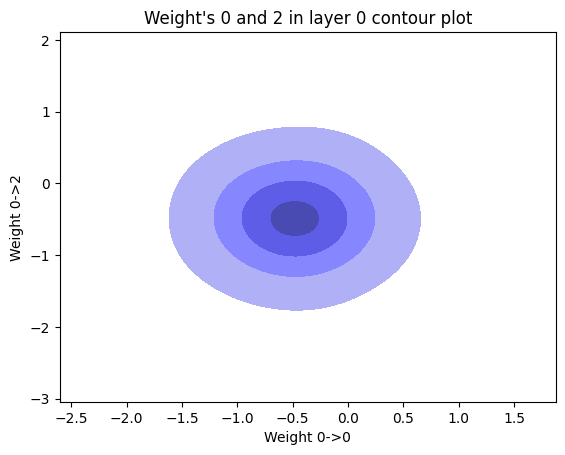

In [75]:
param_1 = 239 #layer 0 bias 9
param_2 = 339

mean = torch.stack((param_means[param_1], param_means[param_1])).numpy()

cov_2x2 = torch.tensor([[slang_cov_matrix[param_1, param_1], slang_cov_matrix[param_1, param_2]],
                        [slang_cov_matrix[param_2, param_1], slang_cov_matrix[param_2, param_2]]]).numpy()

samples = np.random.multivariate_normal(mean, cov_2x2, size=9999)

sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, levels=[0.05, 0.3, 0.6, 0.9, 1], color='blue', bw_method=0.8, gridsize=200)

plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()


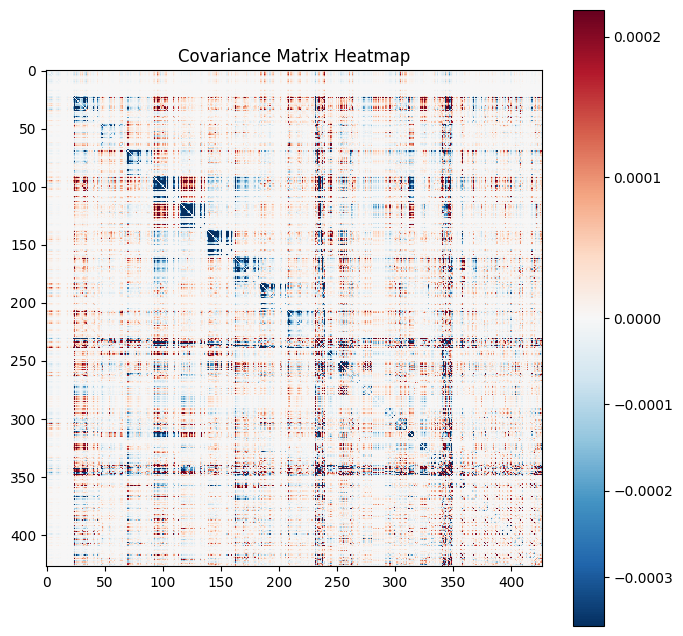

In [ ]:


# Define your colormap
cmap = plt.cm.RdBu_r

# Use TwoSlopeNorm to center the colormap at 0, making 0 correspond to white
norm = mcolors.TwoSlopeNorm(vmin=np.percentile(slang_cov_matrix, 1), vcenter=0, vmax=np.percentile(slang_cov_matrix, 99))

# Plot the matrix
plt.figure(figsize=(8, 8))
plt.imshow(slang_cov_matrix, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar()
plt.title("Covariance Matrix Heatmap")
plt.show()
    

## MFVI


In [17]:
# Open the file and load the data in binary mode
with open('MFVI_Params.pkl', 'rb') as f:
    MFVI = pickle.load(f)


In [18]:
MFVI.keys()

dict_keys(['network.0.w_mu_q', 'network.0.w_log_var_q', 'network.0.b_mu_q', 'network.0.b_log_var_q', 'network.2.w_mu_q', 'network.2.w_log_var_q', 'network.2.b_mu_q', 'network.2.b_log_var_q', 'network.4.w_mu_q', 'network.4.w_log_var_q', 'network.4.b_mu_q', 'network.4.b_log_var_q'])

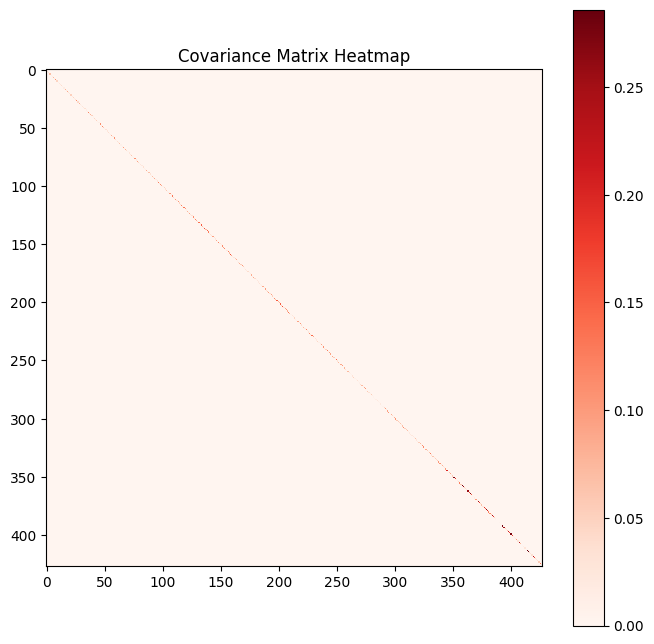

In [19]:
param_values = []

for key in MFVI.keys():
    if 'var_q' in key:  # You can adjust this filter to target other parameters if needed
        param_values.append(MFVI[key].flatten())


stacked_params = np.concatenate(param_values, axis=0)  # Stacks them into a single 1D array

mfvi_cov_matrix = np.diag(np.exp(stacked_params))

# Plot the covariance matrix
plt.figure(figsize=(8, 8))
plt.imshow(mfvi_cov_matrix, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.title("Covariance Matrix Heatmap")
plt.show()




In [42]:
mfvi_means = []

for key in MFVI.keys():
    if 'mu_q' in key:  # You can adjust this filter to target other parameters if needed
        mfvi_means.append(MFVI[key].flatten())


mfvi_means = np.concatenate(mfvi_means, axis=0)  # Stacks them into a single 1D array


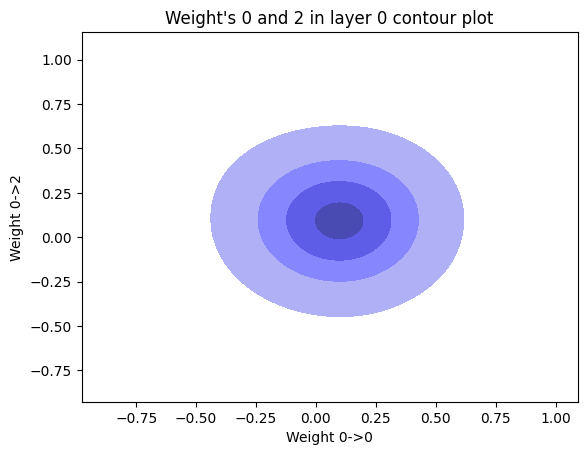

In [46]:
param_1 = 425
param_2 = 426

mean = np.stack((mfvi_means[param_1], mfvi_means[param_1]))

cov_2x2 = np.array([[mfvi_cov_matrix[param_1, param_1], mfvi_cov_matrix[param_1, param_2]],
                        [mfvi_cov_matrix[param_2, param_1], mfvi_cov_matrix[param_2, param_2]]])

samples = np.random.multivariate_normal(mean, cov_2x2, size=9999)

sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, levels=[0.05, 0.3, 0.6, 0.9, 1], color='blue', bw_method=0.8, gridsize=200)

plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()


## Layer wise blocking

In [11]:
# Open the file and load the data in binary mode
with open('layerwise_params.pkl', 'rb') as f:
    layer_wise = pickle.load(f)


In [12]:
param_values = []

for key in layer_wise.keys():
    if 'chol_q' in key:  # You can adjust this filter to target other parameters if needed
        param_values.append(layer_wise[key]@layer_wise[key].T)

lw_cov_matrix = block_diag(*param_values)

lw_means = []

for key in layer_wise.keys():
    if 'mu_q' in key:  # You can adjust this filter to target other parameters if needed
        lw_means.append(layer_wise[key])

lw_means = np.concatenate(lw_means)


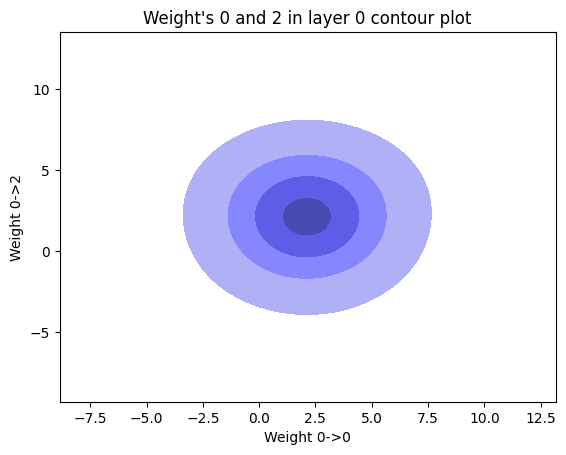

In [68]:
param_1 = 425
param_2 = 426

mean = np.stack((lw_means[param_1], lw_means[param_1]))

cov_2x2 = np.array([[lw_cov_matrix[param_1, param_1], lw_cov_matrix[param_1, param_2]],
                        [lw_cov_matrix[param_2, param_1], lw_cov_matrix[param_2, param_2]]])

samples = np.random.multivariate_normal(mean, cov_2x2, size=9999)

sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, levels=[0.05, 0.3, 0.6, 0.9, 1], color='blue', bw_method=0.8, gridsize=200)

plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()


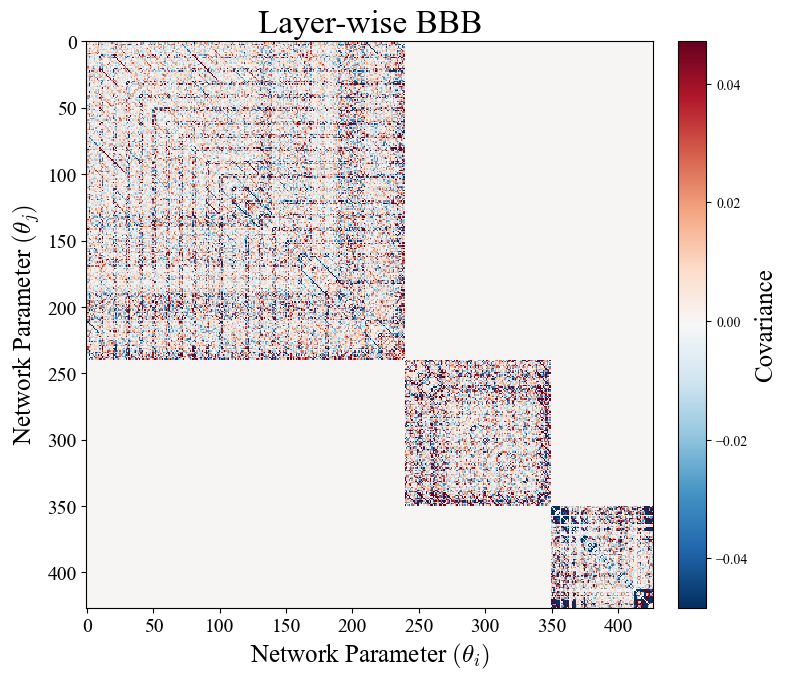

In [36]:
mat = lw_cov_matrix.copy()
np.fill_diagonal(mat, 0)

plt.figure(figsize=(8, 8))
norm = mcolors.Normalize(vmin=np.percentile(mat,1), vmax=np.percentile(mat, 99))  # Reduce extreme values' dominance
plt.imshow(mat, cmap='RdBu_r', norm=norm, interpolation='nearest')
plt.colorbar(fraction=0.0457, pad=0.04).set_label(label = r'Covariance',size=18)
plt.title("Layer-wise BBB", fontsize = 24)
plt.xlabel(r'Network Parameter $(\theta_{i})$', fontsize = 18)
plt.ylabel(r'Network Parameter $(\theta_{j})$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Inter-layer blocking

In [14]:
# Open the file and load the data in binary mode
with open('interlayer_params.pkl', 'rb') as f:
    inter_layer = pickle.load(f)


In [15]:
param_values = []

for key in inter_layer.keys():
    if 'chol_q' in key:  # You can adjust this filter to target other parameters if needed
        param_values.append(inter_layer[key]@inter_layer[key].T)
        
il_cov_matrix = block_diag(*param_values)

il_means = []

for key in inter_layer.keys():
    if 'mu_q' in key:  # You can adjust this filter to target other parameters if needed
        il_means.append(inter_layer[key])

il_means = np.concatenate(il_means)

In [62]:
param_1 = 239 #layer 0 bias 9
param_2 = 339

mean = np.stack((il_means[param_1], il_means[param_1]))

cov_2x2 = np.array([[il_cov_matrix[param_1, param_1], il_cov_matrix[param_1, param_2]],
                        [il_cov_matrix[param_2, param_1], il_cov_matrix[param_2, param_2]]])

samples = np.random.multivariate_normal(mean, cov_2x2, size=9999)

sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, levels=[0.05, 0.3, 0.6, 0.9, 1], color='blue', bw_method=0.8, gridsize=200)

plt.xlabel("Weight 0->0")
plt.ylabel("Weight 0->2")
# plt.xlim([-0.4,0.6])
# plt.ylim([-0.2,0.7])
plt.title("Weight's 0 and 2 in layer 0 contour plot")
plt.show()


: 

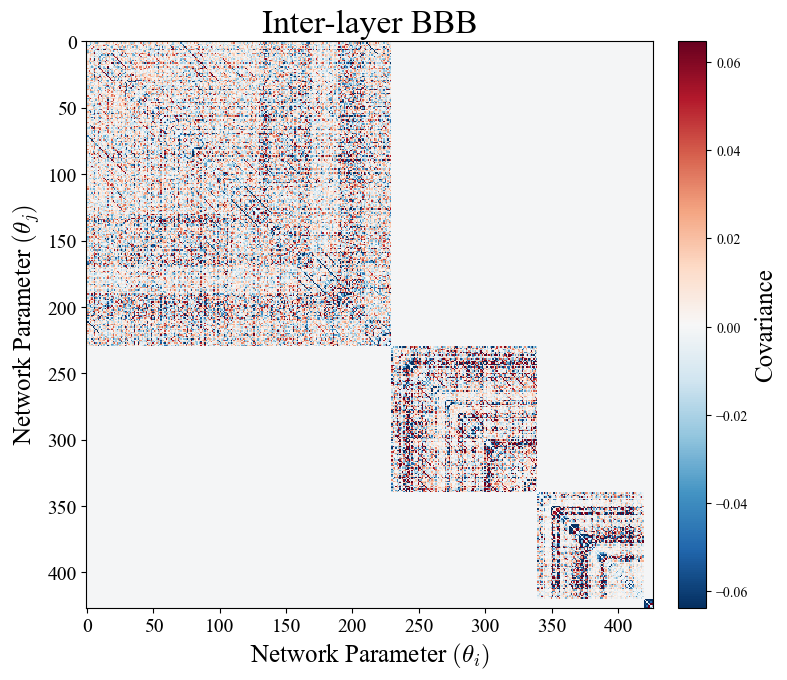

In [40]:
mat = il_cov_matrix.copy()
np.fill_diagonal(mat, 0)

plt.figure(figsize=(8, 8))
norm = mcolors.Normalize(vmin=np.percentile(mat,1), vmax=np.percentile(mat, 99))  # Reduce extreme values' dominance
plt.imshow(mat, cmap='RdBu_r', norm=norm, interpolation='nearest')
plt.colorbar(fraction=0.0457, pad=0.04).set_label(label = r'Covariance',size=18)
plt.title("Inter-layer BBB", fontsize = 24)
plt.xlabel(r'Network Parameter $(\theta_{i})$', fontsize = 18)
plt.ylabel(r'Network Parameter $(\theta_{j})$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()